<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<h1> <center>Residential Location Suitability: Greater Toronto Area Case Study</center></h1>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# 1. Introduction 
&emsp;&emsp; In the realm of real estate, innovative data mining software approaches for real estate evaluation and mapping have long been emerged to collect, analyze and assess data about the constant changes in the real estate market (Hromada, 2015). The potential buyers and sellers are increasingly leaning towards big data assessment support to evaluate real estate property critically rather than rely on published media information (Hromada, 2015). In Canada, much of these property data are governed by the Canadian Real Estate Association (CREA) of real estate brokers and agents through various brokage platforms such as Realtor, Zolo and Centris (Wiki, 2019). Although the data mining approaches are implemented in real estate market evaluation, it is often constrained within the economic characteristics of the physical properties. 
<br>
&emsp;&emsp; The study of residential location suitability classification is an attempt to predict people's residential 
location preferences or suitability based on each individual or household's socio-economical factors outside of the physical characteristics of the properties. It explores the spatial awareness of the residential neighbourhood's characteristics concerning the property. Recognizing the potential of spatial association between people's residential locations and their socio-economic status, this paper examined a small set of social and economic characteristics that may influence or support people's decision on residential locations. In response, the study investigated the Greater Toronto Area (GTA) as a case study to reflect the potential use of spatial awareness for residential location suitability. 

# 2. Literature Review 
&emsp;&emsp; According to Sinniah et al.'s (2014) research, many studies that focus on residential location preferences are modelled based on physical aspects such as land use, facilities, transportation services and travel accessibility. However, very few considerations incorporate the social-cultural characteristics that may influence people's decision in residential location preferences and suitability. They argued that the choice of a residential location is a cluster of both physical and socio-economic related decisions.  In their case study of the Iskandar Malaysia region, the team explored the relationship between people's residential preferences and the inclusion of cultural and religious aspects. The study then found that residential choices were mainly made with consideration heavily given to physical aspects of the property, but certain social aspects have shown significance on influencing the residential selection decisions (Sinniah et al., 2014).
<br>
&emsp;&emsp; In comparison to the Iskandar Malaysia region, the demographics of GTA is considered one of the most multicultural cities in the world with 51.5% of city residents identified as visible minorities in 2016 census (Wiki, 2019). The region celebrated its multiculturalism largely due to the country's open immigration policy with 1 out of 5 people in Canada's population has been classified as foreign-born in 2011 NHS survey (Statistic Canada, 2019). However, with the case of the immigrant population, the vast majority lived in the three largest census metropolitan areas including Toronto, Montreal and Vancouver (Statistic Canada, 2019). Considering with constant dynamic changes of Toronto demographics with newcomers, it is reasonable to examine the socio-economic implications of the region for the study of residential location preferences or suitability for potential decision marking support.

# 3. Methodolgy


&emsp;&emsp; The objective of this study is to explore the existing relationships between people's residential locations and their socio-economic characteristics to attempt to make suitable residential location predictions or recommendations on GTA census subdivisions based on individual's or household's socio-economic status. The case study will implement various data mining classification techniques for area prediction along with the support use of ArcGIS software for raw spatial database development. 
<br>
&emsp;&emsp; The overall workflow of GTA residential location suitability classification study is illustrated as follows: 
<br>&emsp;&emsp; 1. Identify useful socio-economic characteristics dataset at the largest available geographic scale (Census Tract - CT)
<br>&emsp;&emsp; 2. Identify available smaller scale boundary dataset at the largest useful scale (Census Subdivision - CSD)  
&emsp;&emsp; 3. Each unique Census Tract with selected socio-economic characteristics is acted as a data instance with attributes where its agglomerated Census Subdivision is acted as a classification. 
<br>&emsp;&emsp; 4. Census Tract socio-economic datasets are collected and joined with matching Census Subdivision boundary dataset using ArcGIS spatial software as raw database. 
<br>&emsp;&emsp; 5. The raw spatial database is then exported as a CSV file for further data preprocessing dealing with missing values, feature selection and data transformation. 
<br>&emsp;&emsp; 6. Once the database is normalized, the database is split into training and testing instances and implemented through various data mining classification models including decision tree, Naive Bayes, linear perceptron, logistic regression and ensemble boosting for further classification performance evaluations. 


<img src="Images/pic_0.png"> 

## 3.1 Data exploration & collection 



&emsp;&emsp; The raw datasets were obtained from the 2016 census database of Statistics Canada. The census data are generally collected every five years and categorized based on geography scale and survey topics (TRU Libraries, 2019). It provides a statistical portrait of the country's demographic, social and economic characteristics based on geographic scale hierarchy as shown in Figure below (TRU Libraries, 2019). 

<img src="Images/pic_1.png"> 

&emsp;&emsp; For this study, spatial boundary files of Census Metropolitan Area (CMA), Census Subdivision (CSD), and Census Tracts (CT) are chosen for the case study. The CMA is selected as the baseline boundary of the Greater Toronto Area for any data extraction. In terms of residential location suitability classification prediction, CSD name is selected as the target variable which consisted of a total 24 distinct subdivision areas within the CMA region. It was thought as more useful classification design in contrast to the smaller scale of Census Division (CD) with a total of only 2 unique divisions within the CMA region. 
<br>
&emsp;&emsp; As for the socioeconomic characteristics datasets, the geographic scale was set at CT to best harness the useful data given the limited data available at a larger scale. Ideally, we would like to have the largest possible scale dataset such as Dissemination Blocks (DB) for most accurate residential location classification prediction. However, much of the influential socio-economic characteristics such as income, ethnicity and dwelling conditions were not available at such fine-scale due to lack of response rate and privacy issues. Although CT census scale datasets were not ideal, it maintained the essential aspects of the socio-economic characteristics of GTA's demographics including data topics of age and sex, families status, income, education and language. 

<table><tr><td><img src="Images/pic_3.png"></td><td><img src="Images/pic_4.png"></td></tr></table>

&emsp;&emsp; The raw census datasets are joined with matching Census Subdivision and Census Tracts boundaries using ArcGIS spatial software as the initial spatial database. The detailed illustration of the raw spatial database development through ArcGIS are shown in the Appendix. The exported CSV file from the raw spatial database is further used for data mining classification study as shown below.  

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('Database/GT_CT_Profile_2016_f.csv')
df.head()

,OBJECTID,F2016_GTA_CT__CTUID,F2016_GTA_CT__CTNAME,F2016_GTA_CT__PRUID,F2016_GTA_CT__PRNAME,F2016_GTA_CT__CMAUID,F2016_GTA_CT__CMAPUID,F2016_GTA_CT__CMANAME,F2016_GTA_CT__CMATYPE,F2016_GTA_CT__FID_1,...,Workers__compensation_benefits,Working_income_tax_benefit__WITB_,Goods_and_services_tax__GST__credit_and_harmonized_sales_tax__HS,Government_transfers_not_included_elsewhere,After_tax_income,Income_taxes,Net_federal_tax,Provincial_and_territorial_income_taxes,Shape_Length,Shape_Area
0,1,5350422.06,422.06,35,Ontario,535,35535,Toronto,B,1128,...,4505.0,4505.0,4505.0,4510.0,4510.0,4510.0,4510.0,4510.0,5832.064069,1.923806e+06
1,2,5350420.13,420.13,35,Ontario,535,35535,Toronto,B,1174,...,4530.0,4525.0,4525.0,4530.0,4525.0,4525.0,4530.0,4530.0,6138.306419,1.966504e+06
2,3,5350422.03,422.03,35,Ontario,535,35535,Toronto,B,1125,...,5580.0,5580.0,5580.0,5580.0,5580.0,5580.0,5585.0,5580.0,10091.627212,3.776237e+06
3,4,5350422.04,422.04,35,Ontario,535,35535,Toronto,B,1126,...,3250.0,3250.0,3250.0,3245.0,3250.0,3245.0,3250.0,3250.0,4825.809278,8.974442e+05
4,5,5350422.05,422.05,35,Ontario,535,35535,Toronto,B,1127,...,5900.0,5900.0,5895.0,5900.0,5900.0,5900.0,5900.0,5900.0,5522.082627,1.649706e+06


In [3]:
df.shape

(1146, 216)

### Distribution analysis - Count Plot (Target Variable)

Text(0, 0.5, 'Count of census tracts')

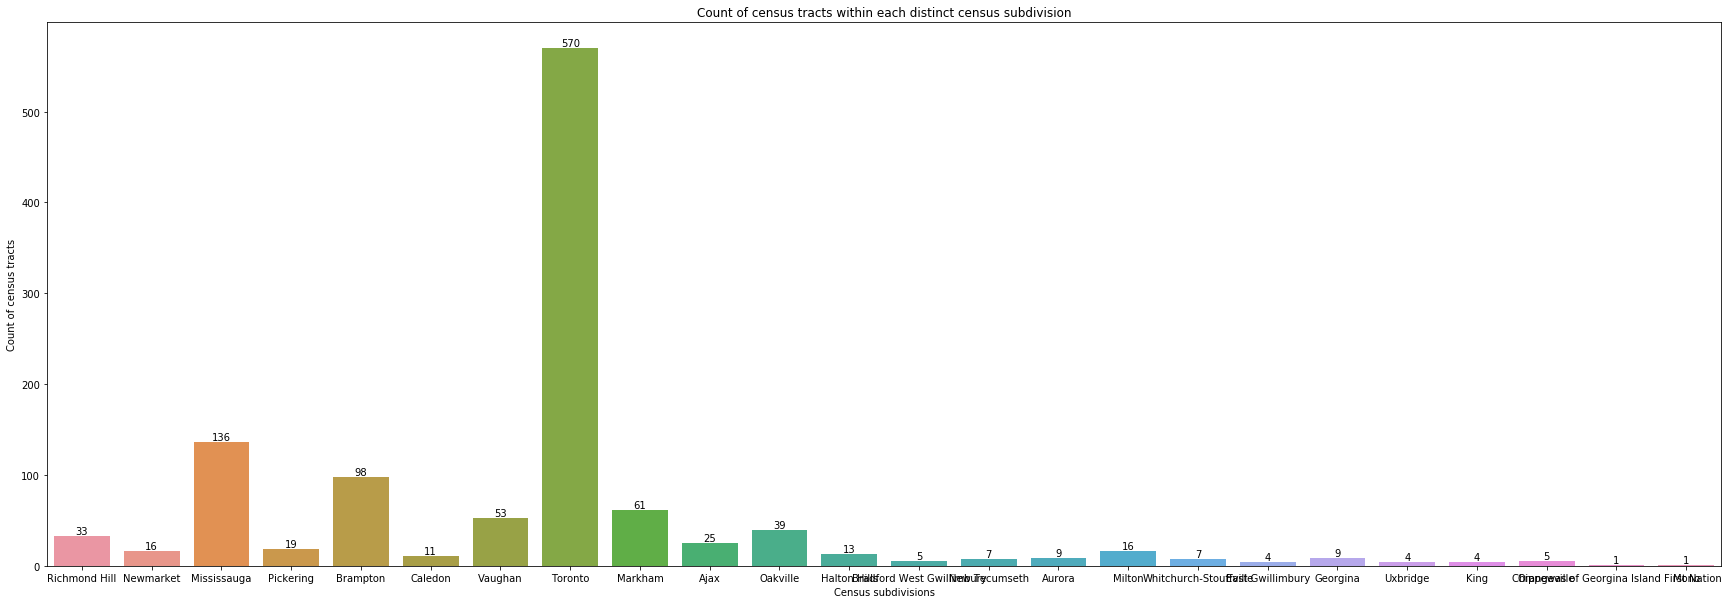

In [4]:
plt.figure(figsize = (30, 10))
CSD_plot = sns.countplot(x = 'F2016_GTA_CT__CSDNAME', data = df)
for p in CSD_plot.patches:
    CSD_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of census tracts within each distinct census subdivision")
plt.xlabel("Census subdivisions")
plt.ylabel("Count of census tracts")

&emsp;&emsp; Based on the count plots of the number of census tracts for each census subdivision, it is clearly evident that Toronto census subdivision contains an excessive amount of census tracts. This may be caused by the various range of census tract area sizes. Such imbalance will further implicate the classification prediction performance and may need to be adjusted given that the census subdivisions are the target variable. 

## 3.2 Feature selection

&emsp;&emsp; As shown above, the raw spatial database contained 1146 distinct data instances (CTs) with 216 attributes. These attributes were composed of a fundamental set of population measurements from the available dataset topics at the CT census scale representing the three major dimensions of demographic, social and economic population characteristics. Within these attributes, a list of features are selected and hypothesized as influential factors revolving the dimensions of population characteristics as summarized below:   
### Demographic dimension: 
#### Age 
Age feature refers to the population count of person's age classified by five-year age groups. <br>
<br>
Statisitcal units: person <br>
Responses: N/A <br>
Selected feature classes: 
- F0_to_4_years
- F5_to_9_years
- F10_to_14_years
- F15_to_19_years
- F20_to_24_years
- F25_to_29_years
- F30_to_34_years
- F35_to_39_years
- F40_to_44_years
- F45_to_49_years
- F50_to_54_years
- F55_to_59_years
- F60_to_64_years
- F65_to_69_years
- F70_to_74_years
- F75_to_79_years
- F80_to_84_years
- F85_to_89_years
- F90_to_94_years
- F95_to_99_years
- F100_years_and_over

#### Sex
Sex feature refers to whether the person is male or female <br>
<br>
Statisitcal units: person <br>
Responses: N/A <br>
Selected feature classes:  
- Male
- Female

### Economic dimension:
#### Total  income 
Total Income feature refers to the average sum of all incomes variables including employment income, investment sources, pension sources, cash income and government sources of the statistical unit for the calendar year 2015 reference period. <br>
<br>
Statisitcal units: person, economic family, census family, private household <br>
Responses: +/- dollar value  <br>
Selected feature classes:  
- Total_income

#### Highest certificate, diploma or degree
Highest certificate, diploma or degree feature refers to the highest level of education that a person has successfully completed.<br>
<br>
Statistical units: person <br>
Responses: No certificate, diploma or degree; High school diploma or equivalency certificate; Certificate of Apprenticeship or Certificate of Qualification; Other trades certificate or diploma; College, CEGEP or other non-university certificate or diploma; University certificate or diploma below bachelor level; Bachelor’s degree; University certificate or diploma above bachelor level; Degree in medicine, dentistry, veterinary medicine or optometry;Master’s degree; Earned doctorate. <br>
Selected feature classes:  
- No_certificate_diploma_or_degree
- Secondary__high__school_diploma_or_equivalency_certificate
- Apprenticeship_or_trades_certificate_or_diploma
- College_CEGEP_or_other_nonuniversity_certificate_or_diploma
- University_certificate_or_diploma_below_bachelor_level
- University_certificate_diploma_or_degree_at_bachelor_level_or_ab

#### Major field of study
Field of study feature refers to the discipline of learning or training associated with a particular program of study. <br>
Remarks: It is important to note that due to the lack of occupation features dataset at the CT level. Field of study is used as a proxy for occupation feature with the assumption of people work in an occupation related to their major field of study. <br>
<br>
Statisitcal units: person<br>
Responses: Assigning a field of study code from the Classification of Instructional Programs (CIP) Canada 2016  <br>
Selected feature classes:  
- No_postsecondary_certificate_diploma_or_degree
- Education
- Visual_and_performing_arts_and_communications_technologies
- Humanities
- Social_and_behavioural_sciences_and_law
- Business_management_and_public_administration
- Physical_and_life_sciences_and_technologies
- Mathematics_computer_and_information_sciences
- Architecture_engineering_and_related_technologies
- Agriculture_natural_resources_and_conservation
- Health_and_related_fields
- Personal_protective_and_transportation_services
- Other_fields_of_study

### Social dimension:
#### Household living arrangements 
Household living arrangement feature refers to whether or not the person lives in a census family in which defines whether or not he or she is related to that person or persons.  <br>
Remarks: It is important to note that the selected feature classes are the condensed major subclasses of individual classes shown in the responses. <br>
<br>
Statistical units: person <br>
Responses: Married spouses and common-law partners; lone parents, children in census families; living with other relatives; living with non-relatives only; living alone. <br>
Selected feature classes:  
- Adults_living_in_census_families
- Adults_not_living_in_census_families

#### Mother tongue
Mother tongue feature refers to the first language learned in childhood. If the child has spoken multiple languages equally at the same time, the child has multiple mother tongues. <br>
Remarks: It is important to note that due to the lack of ethnicity features dataset at the CT level. Mother tongue is used as a proxy for ethnicity feature with the assumption of people who speaks a particular mother tongue represents a specific ethnicity background. Further, only major subsets of languages are selected as the agglomeration of individual-related languages due to the excessive number of languages. Please refer to the Census data dictionary for root-related languages. <br>
<br>
Statistical units: person <br>
Responses: Assigning a mother tongue according to the Mother tongue and home language classification Canada 2016 <br>
Selected feature classes:  
- English
- French
- Aboriginal_languages
- Afro_Asiatic_languages
- Austro_Asiatic_languages
- Austronesian_languages
- Creole_languages
- Dravidian_languages
- Hmong_Mien_languages
- Albanian
- Armenian
- Balto_Slavic_languages
- Celtic_languages
- Germanic_languages
- Greek
- Indo_Iranian_languages
- Italic__Romance__languages
- Japanese
- Kartvelian_languages
- Korean
- Mongolic_languages
- Niger_Congo_languages
- Nilo_Saharan_languages
- Sign_languages
- Sino_Tibetan_languages
- Tai_Kadai_languages
- Turkic_languages
- Uralic_languages
- Other_languages




In [5]:
df_ct= df[[#'F2016_GTA_CT__CTUID', 
           #'F2016_GTA_CT__CMAPUID', 
           #'F2016_GTA_CT__CMANAME', 
           #'CTUID',
           'F0_to_4_years', # Age features 
           'F5_to_9_years', 
           'F10_to_14_years', 
           'F15_to_19_years', 
           'F20_to_24_years', 
           'F25_to_29_years', 
           'F30_to_34_years', 
           'F35_to_39_years', 
           'F40_to_44_years',
           'F45_to_49_years',
           'F50_to_54_years',
           'F55_to_59_years',
           'F60_to_64_years', 
           'F65_to_69_years', 
           'F70_to_74_years', 
           'F75_to_79_years', 
           'F80_to_84_years', 
           'F85_to_89_years',
           'F90_to_94_years',
           'F95_to_99_years',
           'F100_years_and_over',
           'Male', # Sex features 
           'Female',
           'Total_income', # Total income feature 
           'No_certificate_diploma_or_degree', # Highest certificate, diploma or degree features 
           'Secondary__high__school_diploma_or_equivalency_certificate',
           'Apprenticeship_or_trades_certificate_or_diploma',
           'College_CEGEP_or_other_nonuniversity_certificate_or_diploma',
           'University_certificate_or_diploma_below_bachelor_level',
           'University_certificate_diploma_or_degree_at_bachelor_level_or_ab', 
           'No_postsecondary_certificate_diploma_or_degree', # Major field of study features
           'Education', 
           'Visual_and_performing_arts_and_communications_technologies', 
           'Humanities', 
           'Social_and_behavioural_sciences_and_law', 
           'Business_management_and_public_administration', 
           'Physical_and_life_sciences_and_technologies', 
           'Mathematics_computer_and_information_sciences', 
           'Architecture_engineering_and_related_technologies', 
           'Agriculture_natural_resources_and_conservation', 
           'Health_and_related_fields', 
           'Personal_protective_and_transportation_services',
           'Other_fields_of_study',
           'Adults_living_in_census_families', # Household living arrangements features
           'Adults_not_living_in_census_families',
           'English', # Mother tongue features
           'French',
           'Aboriginal_languages',
           'Afro_Asiatic_languages', 
           'Austro_Asiatic_languages', 
           'Austronesian_languages', 
           'Creole_languages', 
           'Dravidian_languages', 
           'Hmong_Mien_languages', 
           'Albanian', 
           'Armenian', 
           'Balto_Slavic_languages', 
           'Celtic_languages', 
           'Germanic_languages', 
           'Greek', 
           'Indo_Iranian_languages', 
           'Italic__Romance__languages', 
           'Japanese', 
           'Kartvelian_languages', 
           'Korean', 
           'Mongolic_languages', 
           'Niger_Congo_languages', 
           'Nilo_Saharan_languages', 
           'Sign_languages', 
           'Sino_Tibetan_languages', 
           'Tai_Kadai_languages', 
           'Turkic_languages', 
           'Uralic_languages', 
           'Other_languages', 
           'F2016_GTA_CT__CSDUID',
           'F2016_GTA_CT__CSDNAME'
         ]]

df_ct.head()

,F0_to_4_years,F5_to_9_years,F10_to_14_years,F15_to_19_years,F20_to_24_years,F25_to_29_years,F30_to_34_years,F35_to_39_years,F40_to_44_years,F45_to_49_years,...,Niger_Congo_languages,Nilo_Saharan_languages,Sign_languages,Sino_Tibetan_languages,Tai_Kadai_languages,Turkic_languages,Uralic_languages,Other_languages,F2016_GTA_CT__CSDUID,F2016_GTA_CT__CSDNAME
0,215,220,245,320,280,265,315,300,305,390,...,5,0,5,560,0,25,30,0,3519038,Richmond Hill
1,280,315,285,295,310,375,435,450,505,505,...,5,0,0,1570,10,30,30,0,3519038,Richmond Hill
2,370,490,540,515,410,380,335,455,695,760,...,5,0,5,2875,5,20,5,0,3519038,Richmond Hill
3,150,245,305,340,240,205,140,195,350,410,...,0,0,0,2005,15,10,10,0,3519038,Richmond Hill
4,205,430,560,690,480,340,215,315,640,820,...,15,0,0,3670,0,20,5,0,3519038,Richmond Hill


### Distribution analysis - Histogram (Feature variables)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022790F8D240>,
      dtype=object)

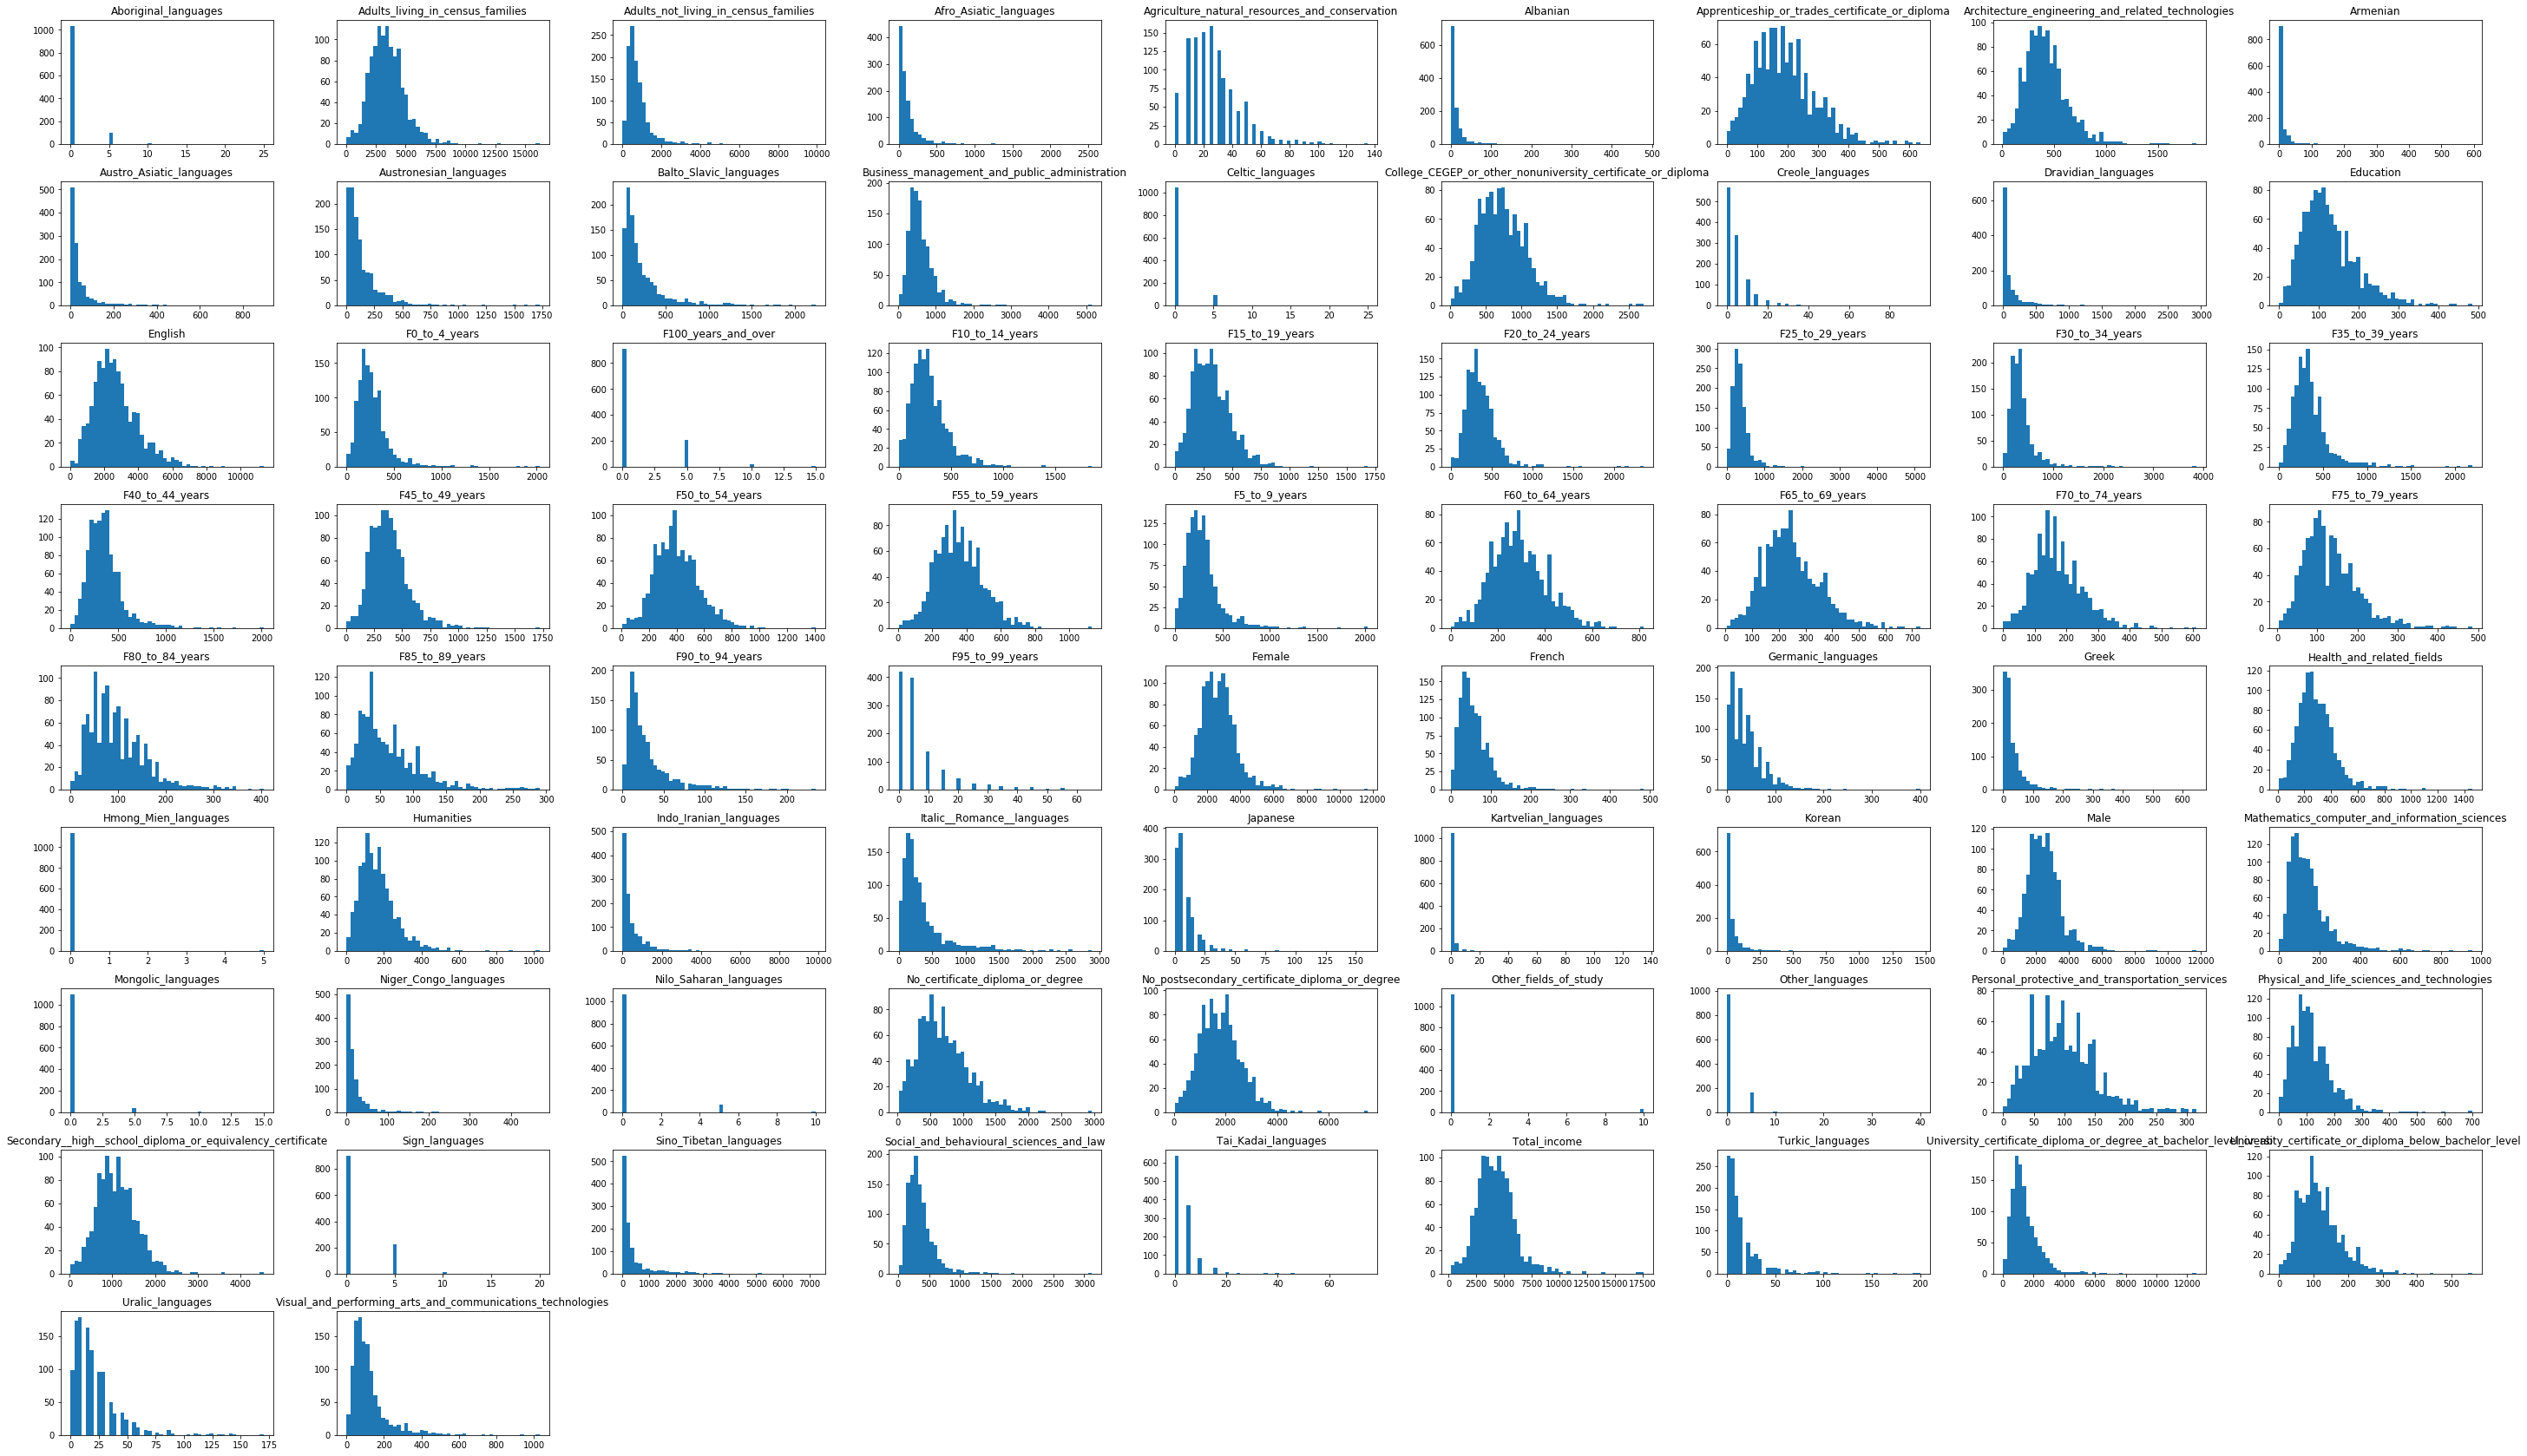

In [6]:
df_ct.loc[:, 'F0_to_4_years':'Other_languages'].hist(bins=50, grid=False, figsize = (50, 30))


&emsp;&emsp; Based on the histograms of each selected features, the majority of the feature variable appear to follow the normal distribution. However, there are outliers and extreme values exist in some features which demand more careful analysis. 

In [7]:
df_ct.to_csv(r'Database/GTA_Profile_2016.csv')

## 3.2 Data Preprocessing 

### Raw data summary statistics 

In [8]:
df_ct.describe()

,F0_to_4_years,F5_to_9_years,F10_to_14_years,F15_to_19_years,F20_to_24_years,F25_to_29_years,F30_to_34_years,F35_to_39_years,F40_to_44_years,F45_to_49_years,...,Mongolic_languages,Niger_Congo_languages,Nilo_Saharan_languages,Sign_languages,Sino_Tibetan_languages,Tai_Kadai_languages,Turkic_languages,Uralic_languages,Other_languages,F2016_GTA_CT__CSDUID
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,...,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.00000,1.146000e+03
mean,270.580279,295.187609,294.280105,319.899651,359.397906,370.253054,366.422339,354.367365,361.640489,384.018325,...,0.248691,21.134380,0.370855,1.147469,450.815881,3.486038,14.664049,21.243455,0.82897,3.520458e+06
std,180.863622,196.892418,182.515731,166.858498,195.316973,299.033781,279.994825,223.509457,198.661165,176.711149,...,1.272526,36.851825,1.407214,2.385560,780.222011,6.205947,20.863366,20.330309,2.31993,2.618418e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.518001e+06
25%,165.000000,175.000000,170.000000,195.000000,240.000000,220.000000,210.000000,220.000000,235.000000,260.000000,...,0.000000,5.000000,0.000000,0.000000,65.000000,0.000000,5.000000,10.000000,0.00000,3.520005e+06
50%,235.000000,260.000000,260.000000,300.000000,330.000000,317.500000,315.000000,315.000000,330.000000,365.000000,...,0.000000,10.000000,0.000000,0.000000,160.000000,0.000000,10.000000,15.000000,0.00000,3.520005e+06
75%,330.000000,360.000000,375.000000,420.000000,450.000000,435.000000,433.750000,435.000000,430.000000,475.000000,...,0.000000,25.000000,0.000000,0.000000,405.000000,5.000000,20.000000,30.000000,0.00000,3.521005e+06
max,2030.000000,2030.000000,1845.000000,1685.000000,2365.000000,5140.000000,3855.000000,2195.000000,2020.000000,1720.000000,...,15.000000,470.000000,10.000000,20.000000,7230.000000,75.000000,200.000000,170.000000,40.00000,3.543014e+06


### Check missing values 

In [9]:
df_ct.apply(lambda x: sum(x.isnull()),axis=0) 

F0_to_4_years                                                       0
F5_to_9_years                                                       0
F10_to_14_years                                                     0
F15_to_19_years                                                     0
F20_to_24_years                                                     0
F25_to_29_years                                                     0
F30_to_34_years                                                     0
F35_to_39_years                                                     0
F40_to_44_years                                                     0
F45_to_49_years                                                     0
F50_to_54_years                                                     0
F55_to_59_years                                                     0
F60_to_64_years                                                     0
F65_to_69_years                                                     0
F70_to_74_years     

In [10]:
# Replace missing value with the mean
df_ct['Total_income'].fillna(df_ct['Total_income'].mean(), inplace=True)
df_ct.apply(lambda x: sum(x.isnull()),axis=0) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


F0_to_4_years                                                       0
F5_to_9_years                                                       0
F10_to_14_years                                                     0
F15_to_19_years                                                     0
F20_to_24_years                                                     0
F25_to_29_years                                                     0
F30_to_34_years                                                     0
F35_to_39_years                                                     0
F40_to_44_years                                                     0
F45_to_49_years                                                     0
F50_to_54_years                                                     0
F55_to_59_years                                                     0
F60_to_64_years                                                     0
F65_to_69_years                                                     0
F70_to_74_years     

### Set features and target variable

In [11]:
# Set feature variables 
X = df_ct.loc[:, 'F0_to_4_years':'Other_languages'] 
X.head()

,F0_to_4_years,F5_to_9_years,F10_to_14_years,F15_to_19_years,F20_to_24_years,F25_to_29_years,F30_to_34_years,F35_to_39_years,F40_to_44_years,F45_to_49_years,...,Korean,Mongolic_languages,Niger_Congo_languages,Nilo_Saharan_languages,Sign_languages,Sino_Tibetan_languages,Tai_Kadai_languages,Turkic_languages,Uralic_languages,Other_languages
0,215,220,245,320,280,265,315,300,305,390,...,80,0,5,0,5,560,0,25,30,0
1,280,315,285,295,310,375,435,450,505,505,...,305,0,5,0,0,1570,10,30,30,0
2,370,490,540,515,410,380,335,455,695,760,...,155,0,5,0,5,2875,5,20,5,0
3,150,245,305,340,240,205,140,195,350,410,...,105,0,0,0,0,2005,15,10,10,0
4,205,430,560,690,480,340,215,315,640,820,...,160,0,15,0,0,3670,0,20,5,0


In [12]:
# Set target variable 
y = df_ct.loc[:, 'F2016_GTA_CT__CSDUID']  
y.head()

0    3519038
1    3519038
2    3519038
3    3519038
4    3519038
Name: F2016_GTA_CT__CSDUID, dtype: int64

### Data transformation/normalization  

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

print (X)

[[0.10591133 0.10837438 0.13279133 ... 0.125      0.17647059 0.        ]
 [0.13793103 0.15517241 0.15447154 ... 0.15       0.17647059 0.        ]
 [0.18226601 0.24137931 0.29268293 ... 0.1        0.02941176 0.        ]
 ...
 [0.1773399  0.15763547 0.13821138 ... 0.725      0.08823529 0.        ]
 [0.22906404 0.2044335  0.16260163 ... 0.15       0.08823529 0.        ]
 [0.1453202  0.13546798 0.12466125 ... 0.15       0.05882353 0.125     ]]


# 4. Results

## 4.1 Data Mining & Evaluation 

In [14]:
from sklearn.tree import DecisionTreeClassifier # Inherently multiclass
from sklearn.naive_bayes import BernoulliNB # Inherently multiclass 
from sklearn.linear_model import Perceptron # Multiclass as One-vs-All
from sklearn.linear_model import LogisticRegression # Multiclass as One-vs-All
from sklearn.ensemble import GradientBoostingClassifier # Multiclass as One-vs-All
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix

# Plot confusion matrix 
def make_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    import itertools
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > 50 else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def plot_confusion_matrix(y_test_set, y_pred):
    class_names = ['Ajax','Aurora', 'Bradford West Gwillimbury','Brampton','Caledon','Chippewas of Georgina Island First Nation',
                   'East Gwillimbury','Georgina','Halton Hills','King','Markham','Milton','Mississauga','Mono','New Tecumseth',
                   'Newmarket','Oakville','Orangeville','Pickering','Richmond Hill','Toronto','Uxbridge','Vaughan','Whitchurch-Stouffville']
    cnf_matrix = confusion_matrix(y_test_set, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure(figsize = (60, 40))
    make_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix');

# Generic classification model function & performance evaluation 
def classification_model(model, data):   
#     # Splitting Data 
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)    
#     # Fit the model:
#     model.fit(X, y)    
#     # Make predictions on training set: 
#     y_pred = model.predict(X)    
#     # Print Accurracy 
#     accuracy = metrics.accuracy_score(y_pred, y)
#     print ("Accuracy : %s" % "{0:.2%}".format(accuracy))
   
    # Perform k-fold cross-validation with 10 folds and random shuffling 
    cv = KFold(n_splits=10, shuffle = True, random_state=1)
    score = []
    accuracy = []
    precision = []
    recall = []
    f1score = []
    
    for train_idx, test_idx in cv.split(X):
        print("Train Index: ", train_idx, "\n")
        print("Test Index: ", test_idx)

        X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
    
        # Training the algorithm using the predictors and target.
        model.fit(X_train, y_train)
        
        # Make predictions on training set: 
        y_pred = model.predict(X_test)    
        
        # Report scores from each cross-validation run
        score.append(model.score(X_test, y_test))
        
        # Report accuracy, precision, recall and f1_score
        accuracy.append(model.score(X_test, y_test))
        precision.append(precision_score(y_test, y_pred, average='micro')) # total ratio vs for each class = 'None'
        recall.append(recall_score(y_test, y_pred, average='micro'))
        f1score.append(f1_score(y_test, y_pred, average='micro'))
        
    print ()
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(score)))
    print ()
    print ("Accuracy = %s ," % "{0:.3%}".format(np.mean(accuracy)), 
           "Precision = %s ," % "{0:.3%}".format(np.mean(precision)), 
           "Recall = %s ," % "{0:.3%}".format(np.mean(recall)), 
           "F1_score = %s " % "{0:.3%}".format(np.mean(f1score))
          )
    print ()
    plot_confusion_matrix(y_test, y_pred)
    
    #Fit the model again so that it can be refered outside the function:
    model.fit(X, y) 

### Decision Tree (Inherently multiclass)

Train Index:  [   0    1    2 ... 1143 1144 1145] 

Test Index:  [   6   27   41   47   49   65   80   81   90   94  101  108  111  119
  120  126  133  135  142  148  154  159  181  186  190  194  201  204
  205  220  228  248  255  258  301  306  340  350  372  382  390  393
  395  414  452  455  463  464  472  484  494  512  521  529  530  550
  567  572  577  587  599  604  628  655  664  688  691  701  709  713
  721  725  734  735  742  746  757  765  767  775  776  786  798  802
  815  817  823  828  838  842  877  898  916  929  934  943  948  950
  967  982  985  996  998 1006 1072 1085 1100 1108 1112 1118 1125 1126
 1133 1136 1142]
Train Index:  [   0    1    2 ... 1143 1144 1145] 

Test Index:  [   8   10   34   35   60   62   75   76   78   85   88   99  104  139
  156  165  180  189  191  195  200  202  216  236  259  274  283  298
  304  314  323  329  331  335  348  349  388  401  403  430  439  443
  471  473  478  480  482  493  495  509  528  534  537  541  546  554
 

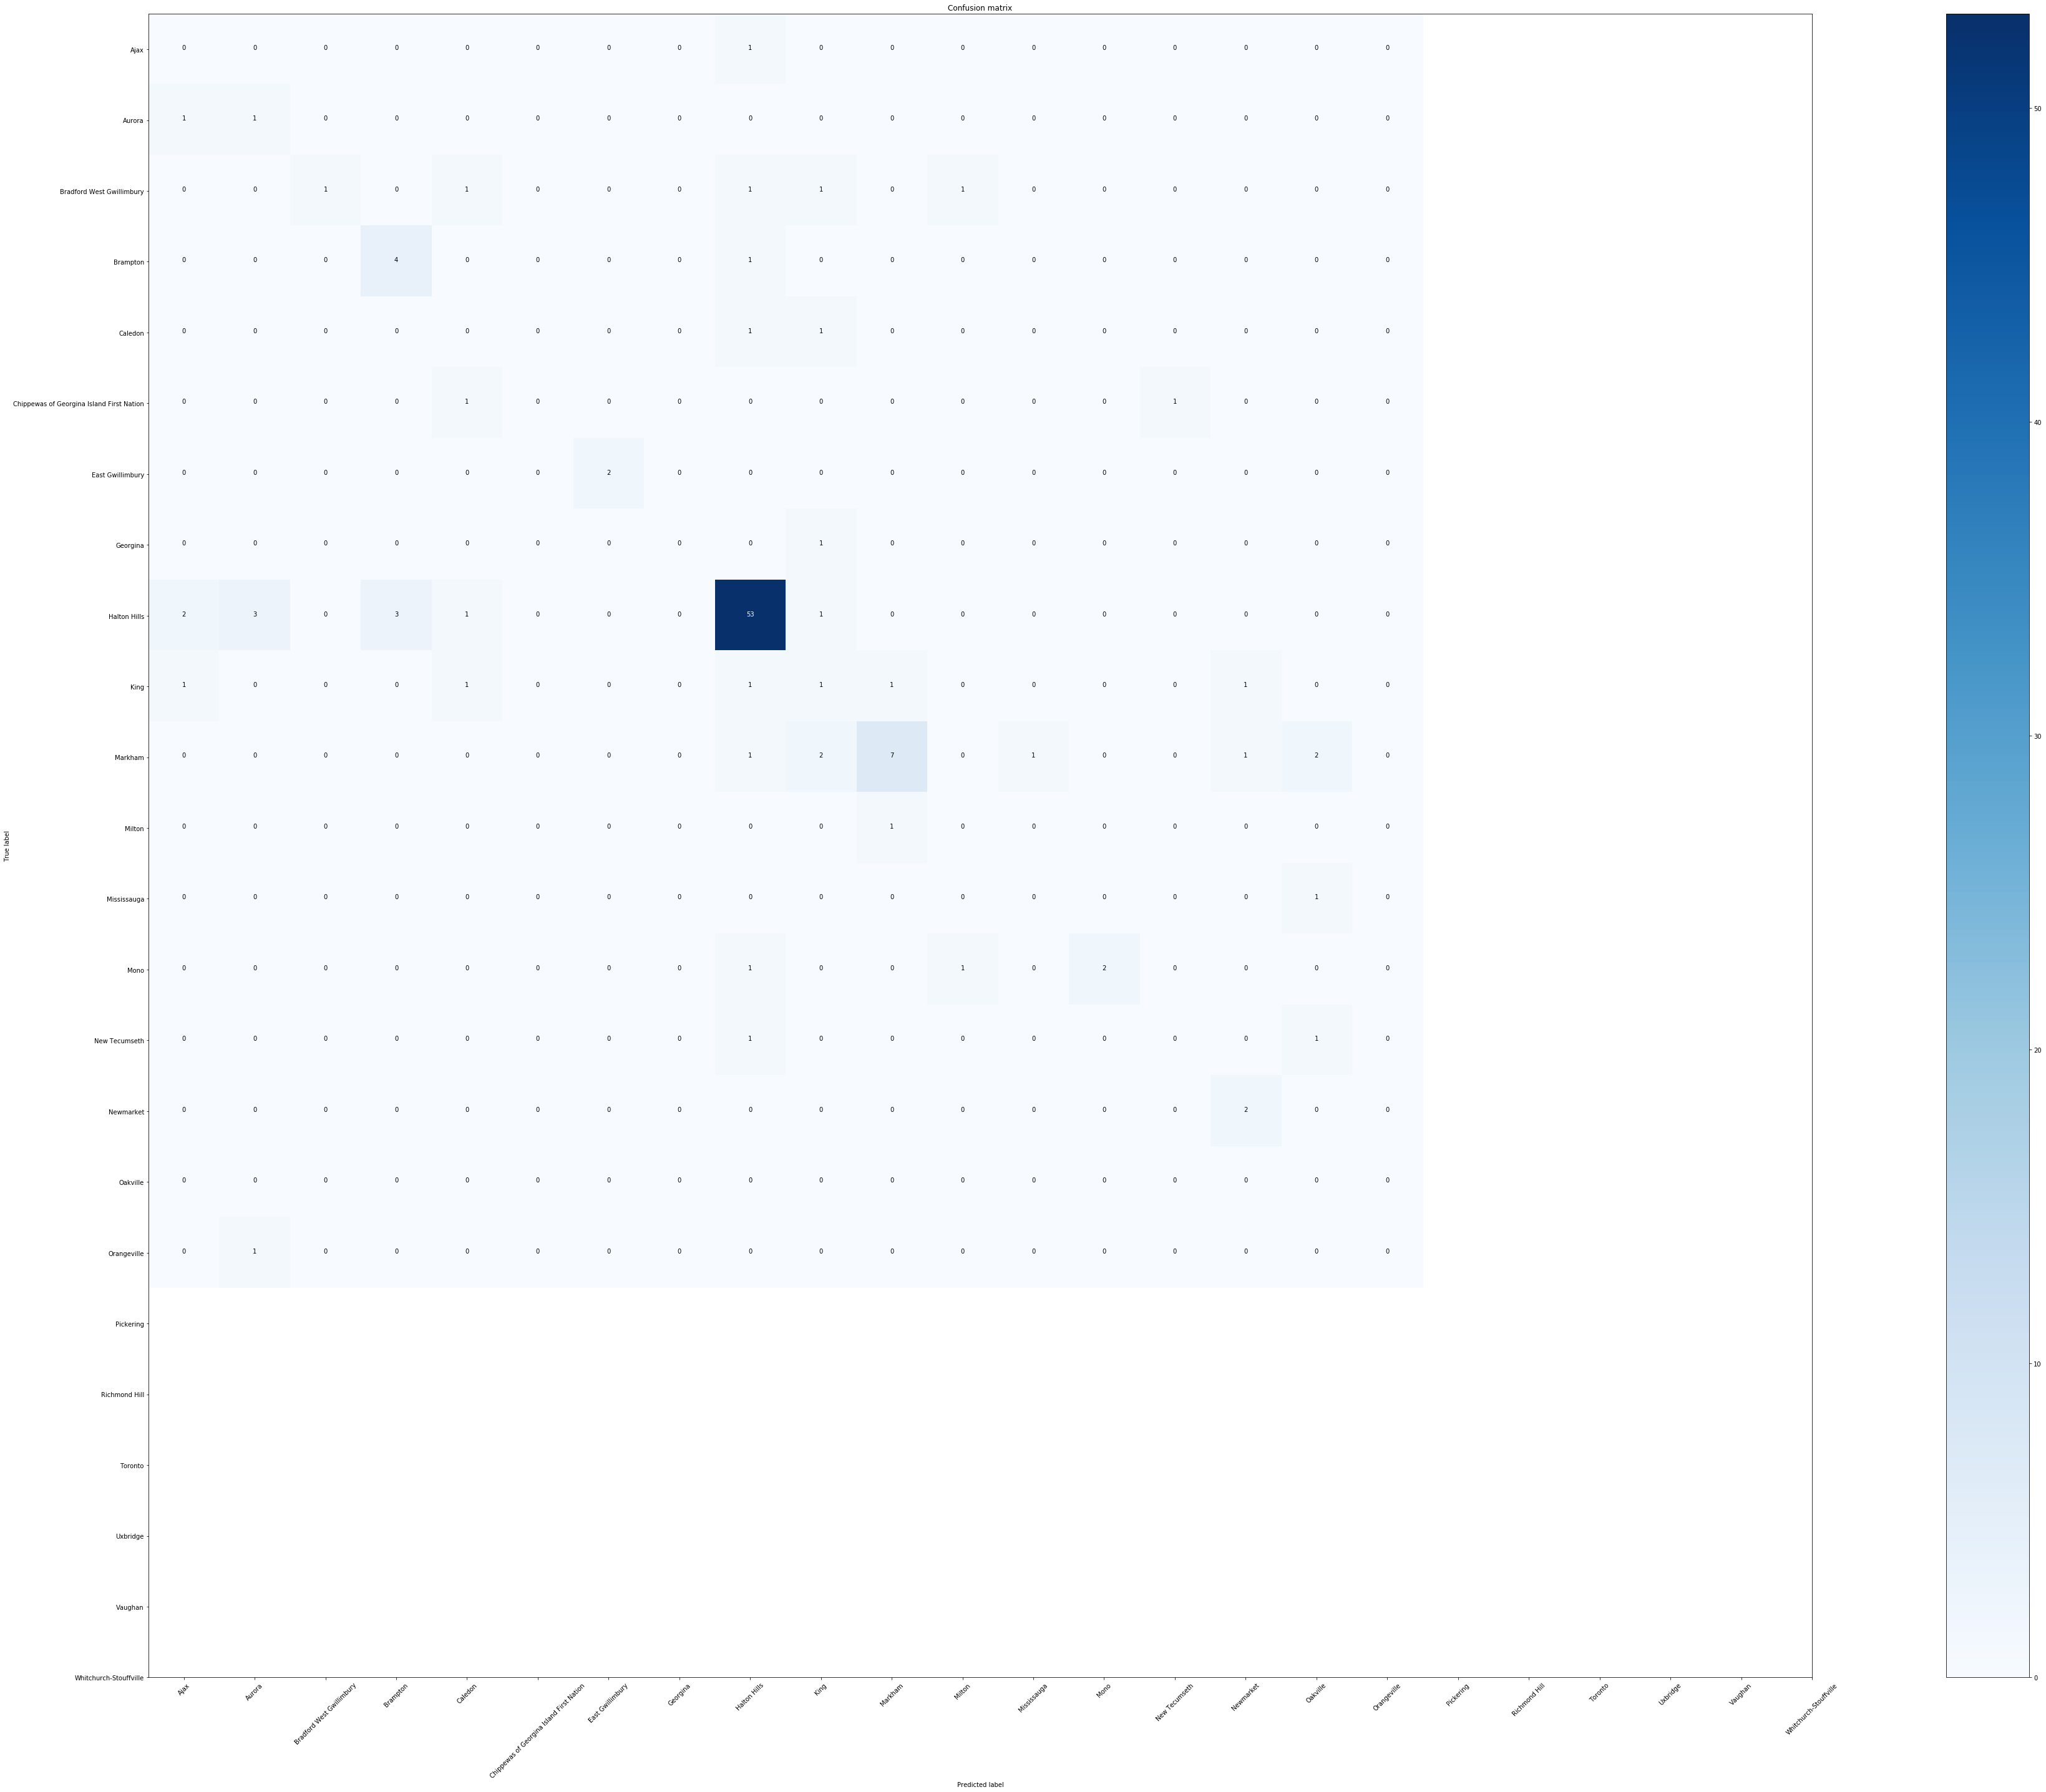

In [15]:
model = DecisionTreeClassifier()
classification_model(model, df_ct)


### Naive Bayes (Inherently multiclass)

Train Index:  [   0    1    2 ... 1143 1144 1145] 

Test Index:  [   6   27   41   47   49   65   80   81   90   94  101  108  111  119
  120  126  133  135  142  148  154  159  181  186  190  194  201  204
  205  220  228  248  255  258  301  306  340  350  372  382  390  393
  395  414  452  455  463  464  472  484  494  512  521  529  530  550
  567  572  577  587  599  604  628  655  664  688  691  701  709  713
  721  725  734  735  742  746  757  765  767  775  776  786  798  802
  815  817  823  828  838  842  877  898  916  929  934  943  948  950
  967  982  985  996  998 1006 1072 1085 1100 1108 1112 1118 1125 1126
 1133 1136 1142]
Train Index:  [   0    1    2 ... 1143 1144 1145] 

Test Index:  [   8   10   34   35   60   62   75   76   78   85   88   99  104  139
  156  165  180  189  191  195  200  202  216  236  259  274  283  298
  304  314  323  329  331  335  348  349  388  401  403  430  439  443
  471  473  478  480  482  493  495  509  528  534  537  541  546  554
 

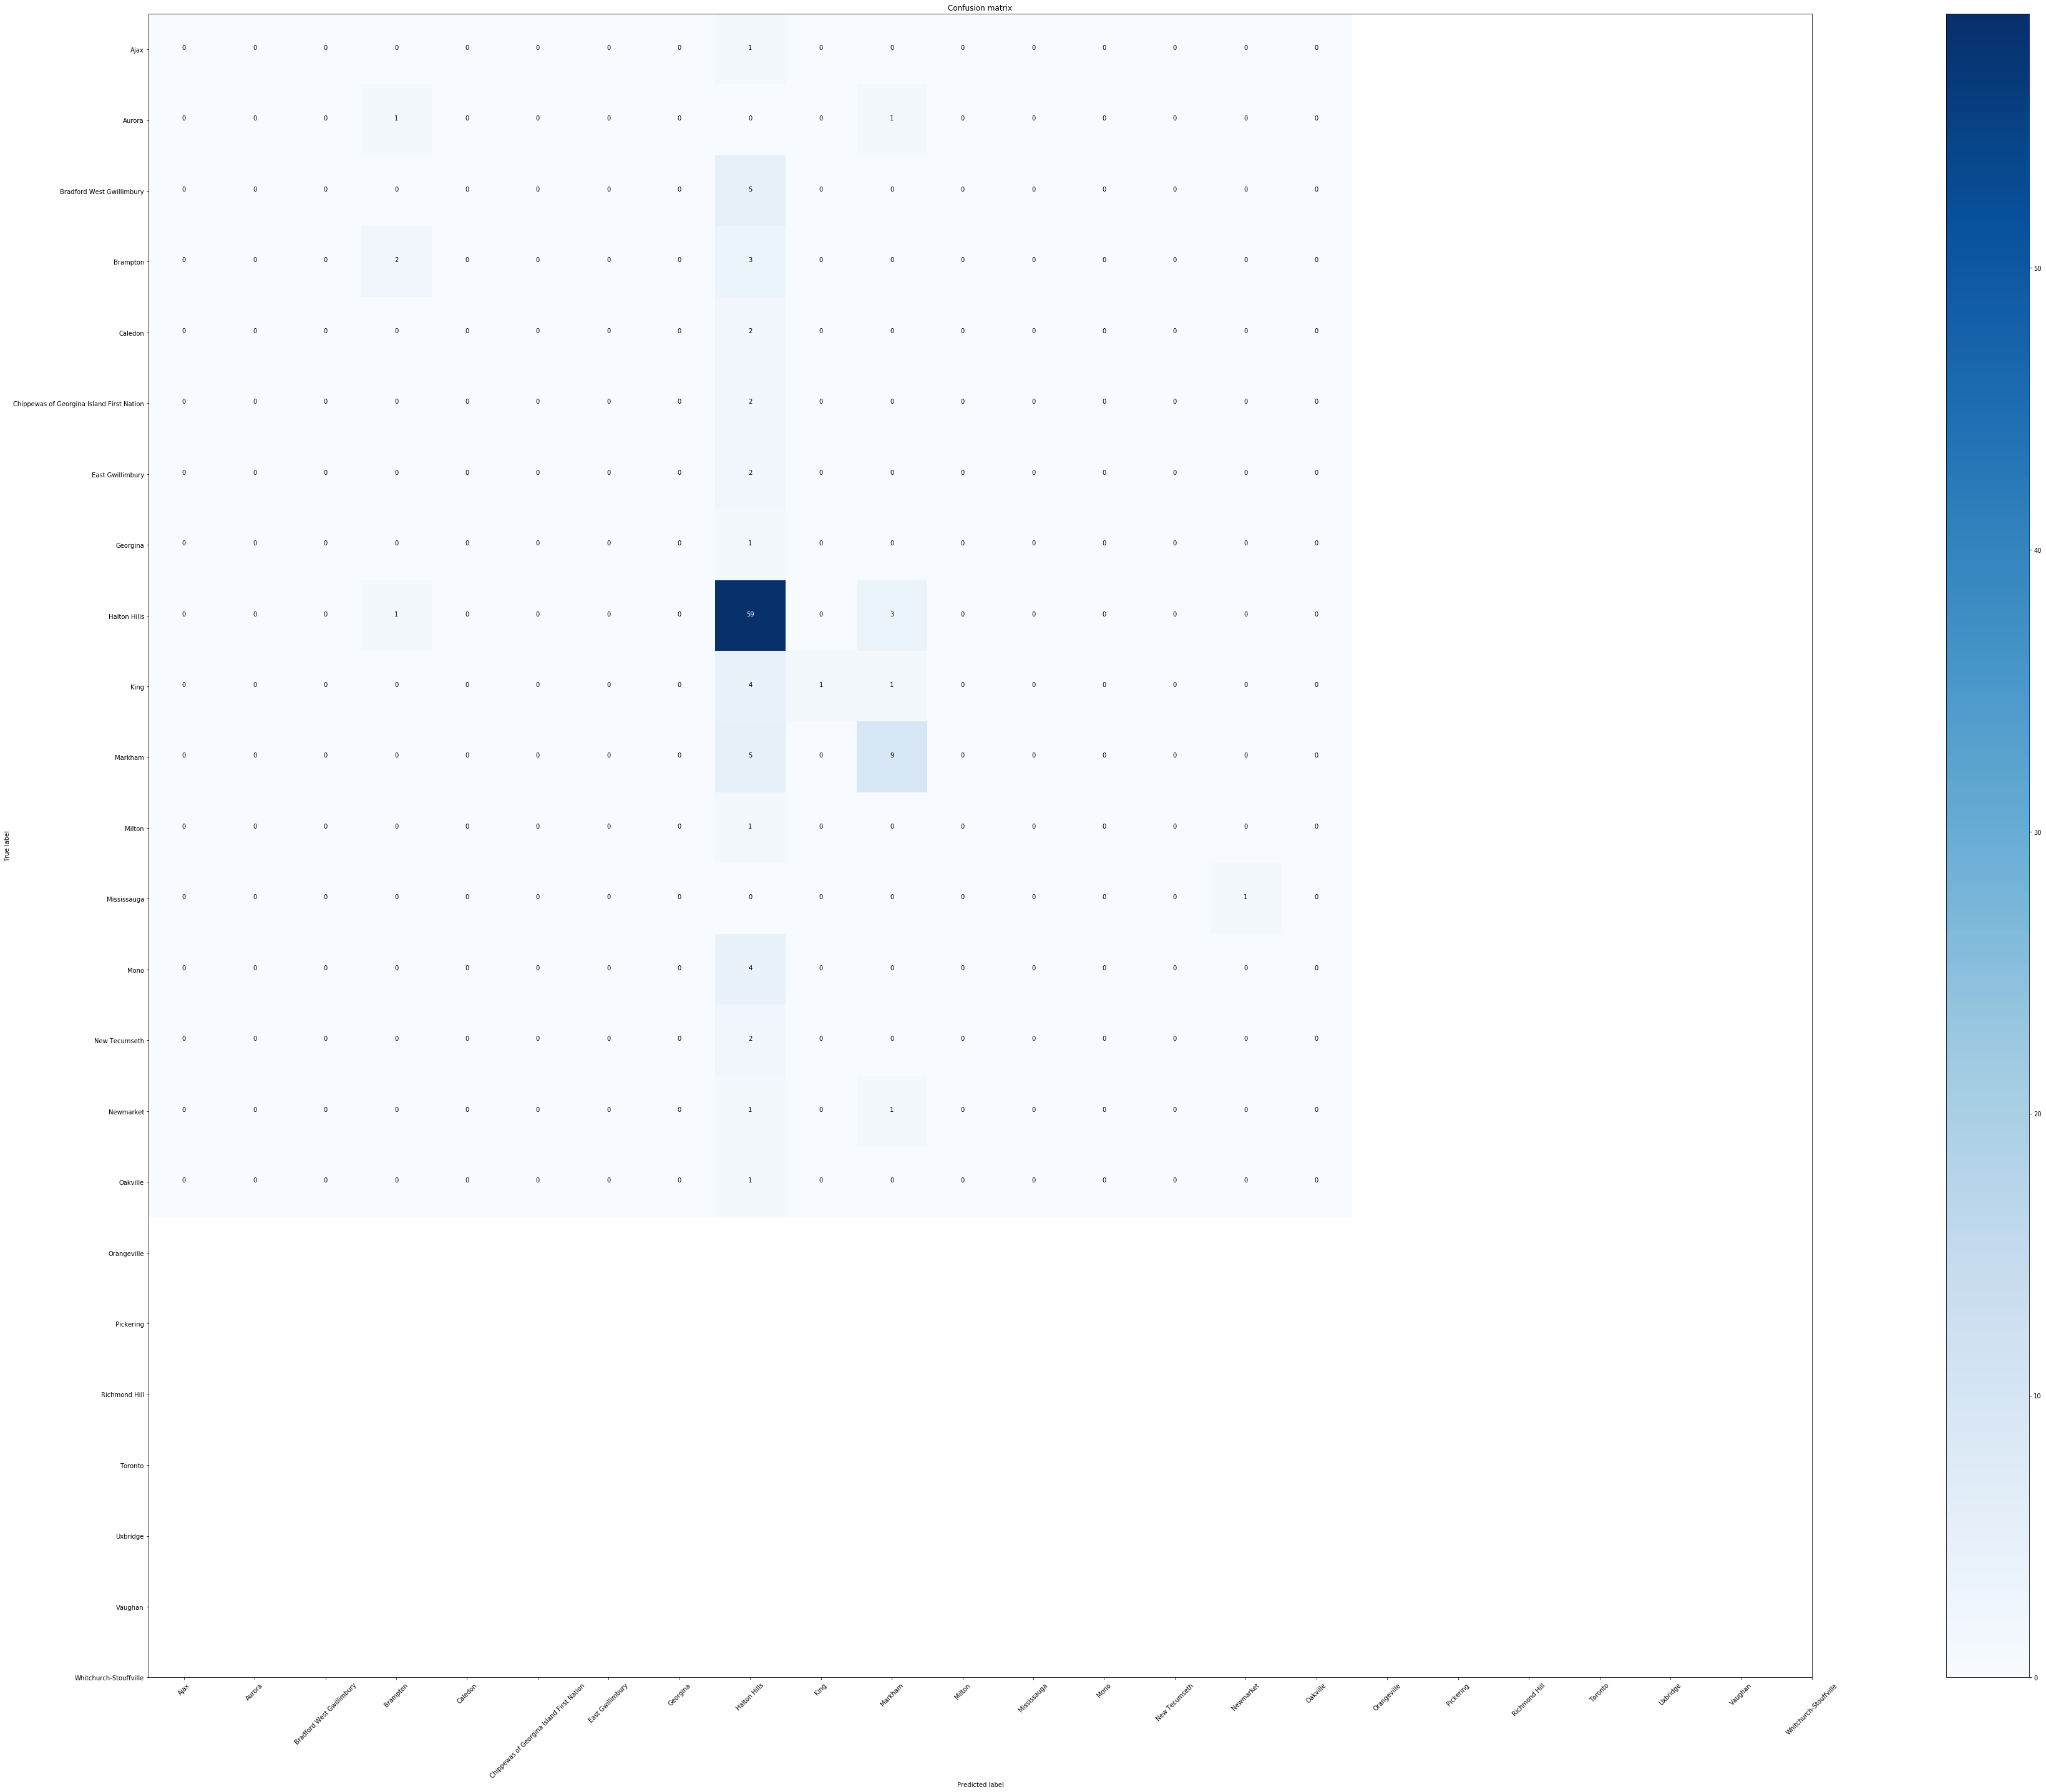

In [16]:
model = BernoulliNB()
classification_model(model, df_ct)

### Linear Perceptron (Multiclass as One-vs-All)

Train Index:  [   0    1    2 ... 1143 1144 1145] 

Test Index:  [   6   27   41   47   49   65   80   81   90   94  101  108  111  119
  120  126  133  135  142  148  154  159  181  186  190  194  201  204
  205  220  228  248  255  258  301  306  340  350  372  382  390  393
  395  414  452  455  463  464  472  484  494  512  521  529  530  550
  567  572  577  587  599  604  628  655  664  688  691  701  709  713
  721  725  734  735  742  746  757  765  767  775  776  786  798  802
  815  817  823  828  838  842  877  898  916  929  934  943  948  950
  967  982  985  996  998 1006 1072 1085 1100 1108 1112 1118 1125 1126
 1133 1136 1142]
Train Index:  [   0    1    2 ... 1143 1144 1145] 

Test Index:  [   8   10   34   35   60   62   75   76   78   85   88   99  104  139
  156  165  180  189  191  195  200  202  216  236  259  274  283  298
  304  314  323  329  331  335  348  349  388  401  403  430  439  443
  471  473  478  480  482  493  495  509  528  534  537  541  546  554
 

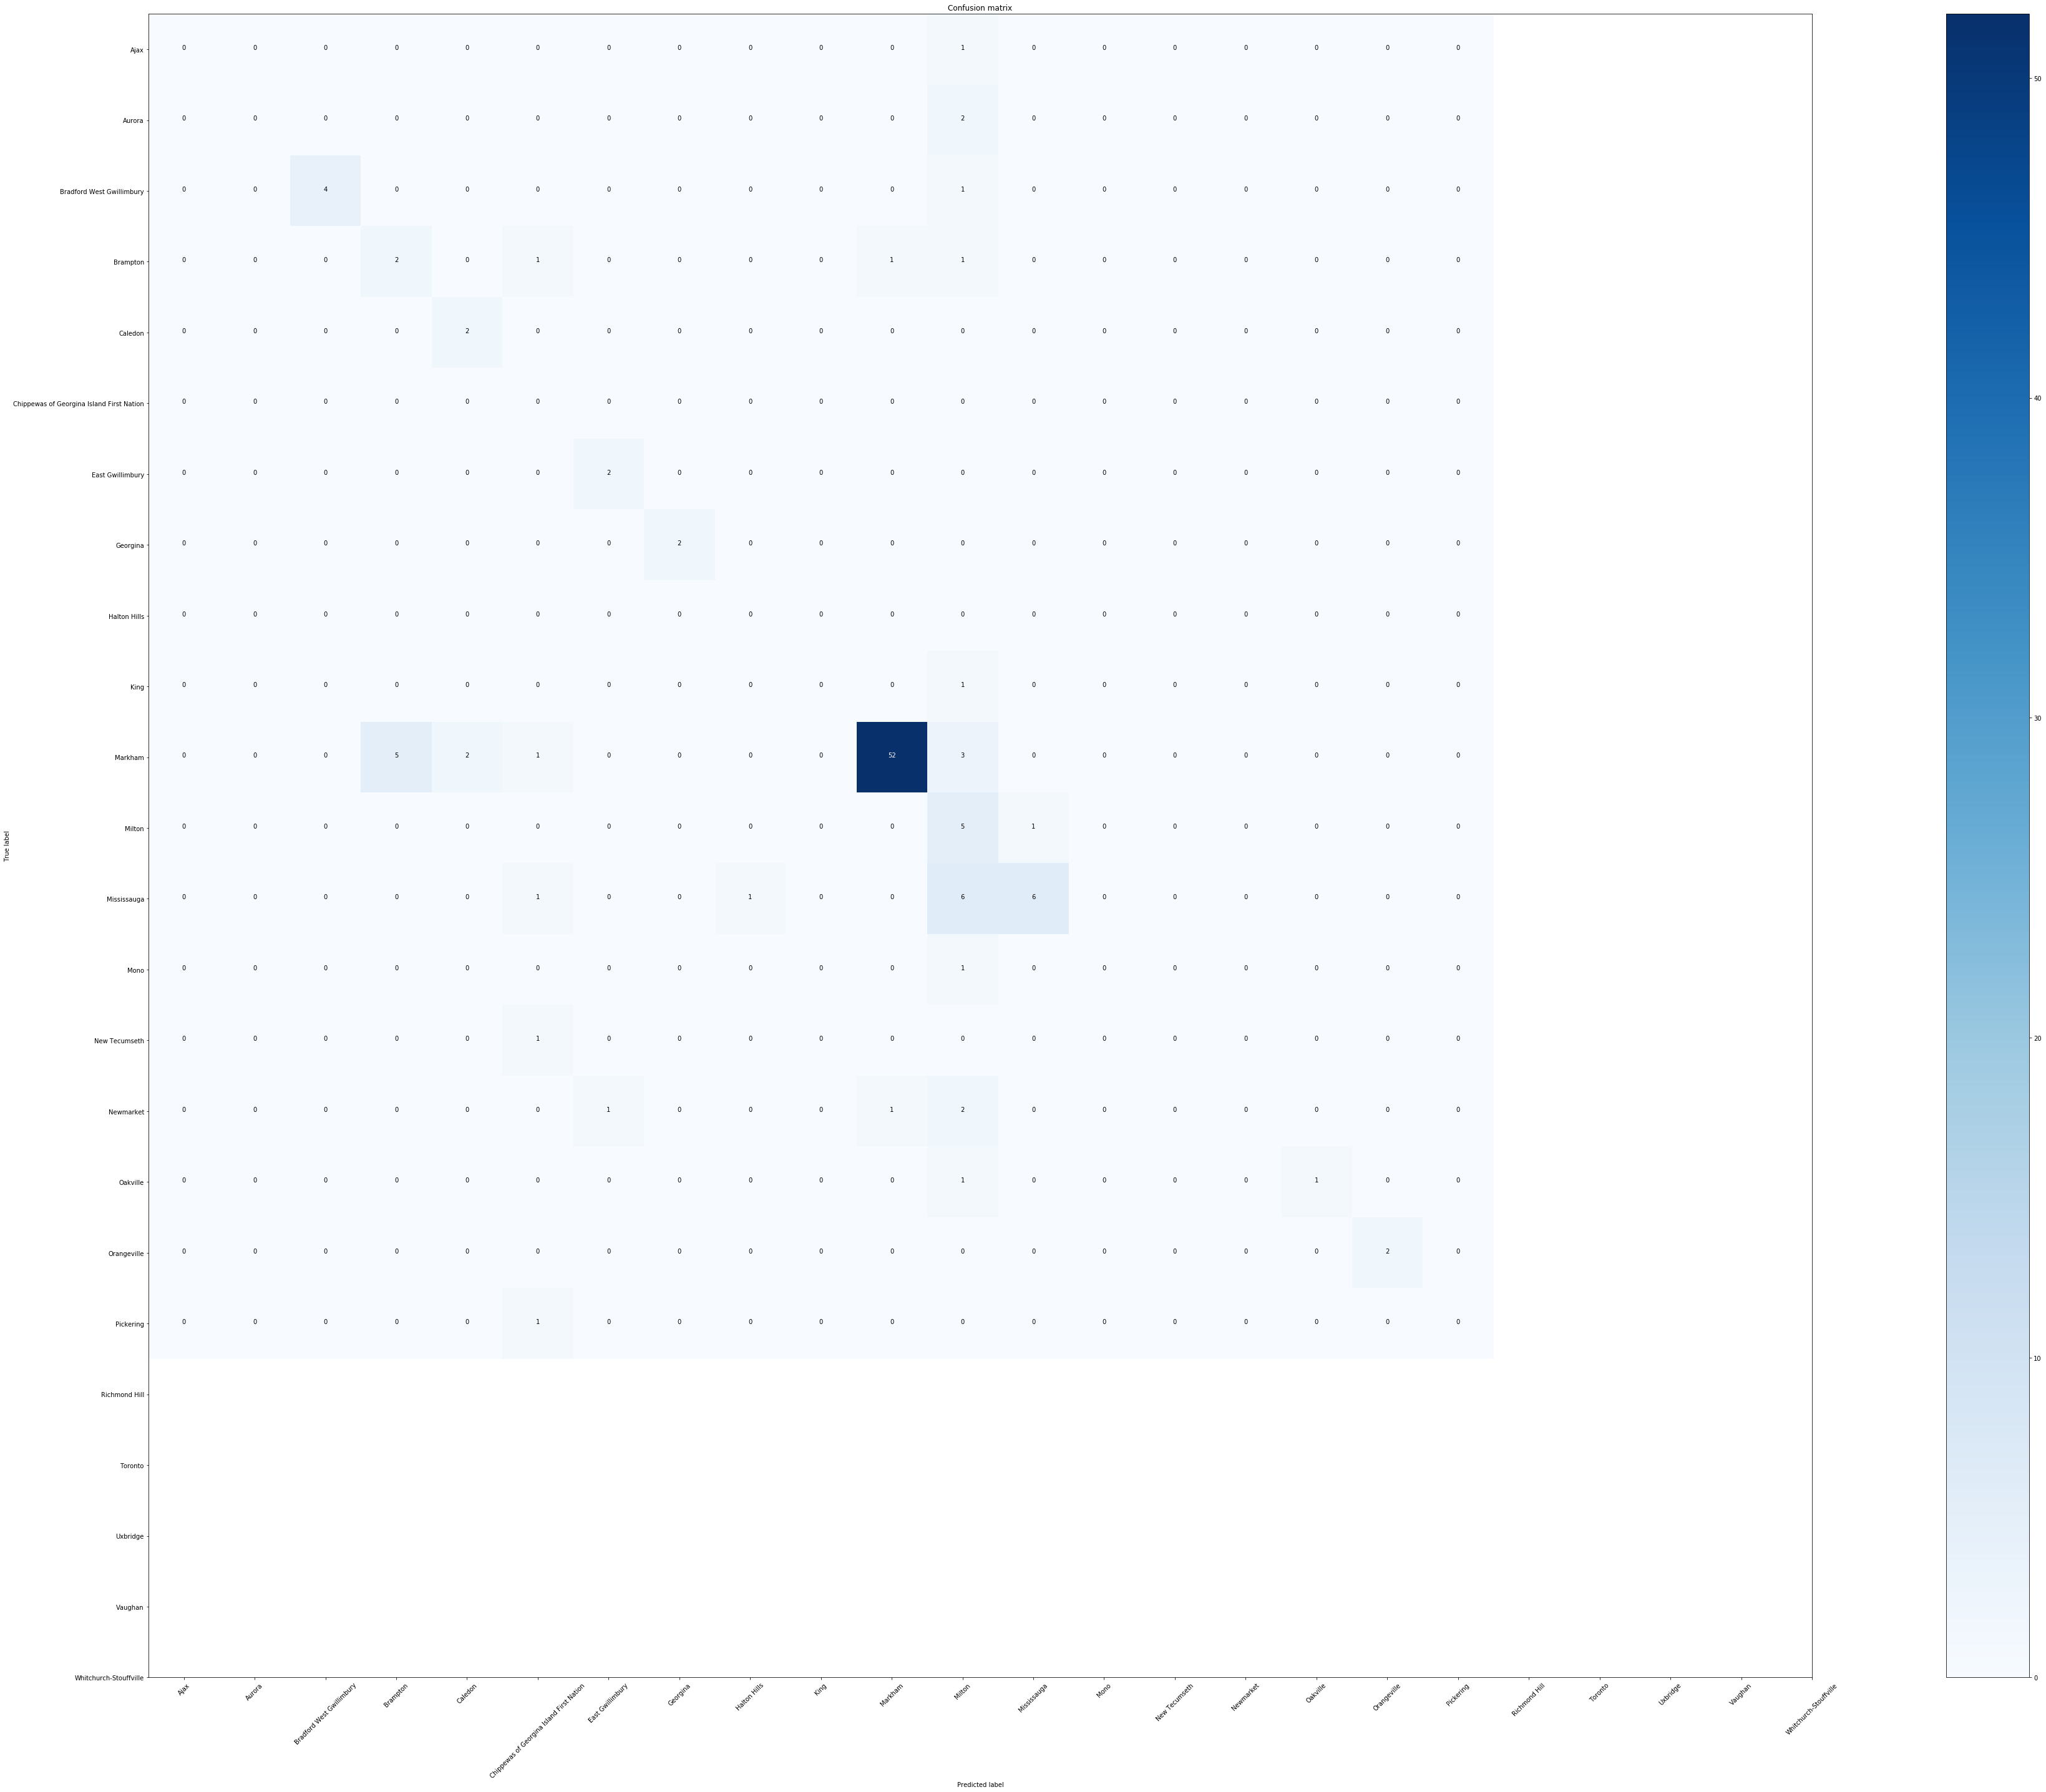

In [17]:
model = Perceptron()
classification_model(model, df_ct)

### Logistic Regression (Multiclass as One-vs-All)


Train Index:  [   0    1    2 ... 1143 1144 1145] 

Test Index:  [   6   27   41   47   49   65   80   81   90   94  101  108  111  119
  120  126  133  135  142  148  154  159  181  186  190  194  201  204
  205  220  228  248  255  258  301  306  340  350  372  382  390  393
  395  414  452  455  463  464  472  484  494  512  521  529  530  550
  567  572  577  587  599  604  628  655  664  688  691  701  709  713
  721  725  734  735  742  746  757  765  767  775  776  786  798  802
  815  817  823  828  838  842  877  898  916  929  934  943  948  950
  967  982  985  996  998 1006 1072 1085 1100 1108 1112 1118 1125 1126
 1133 1136 1142]
Train Index:  [   0    1    2 ... 1143 1144 1145] 

Test Index:  [   8   10   34   35   60   62   75   76   78   85   88   99  104  139
  156  165  180  189  191  195  200  202  216  236  259  274  283  298
  304  314  323  329  331  335  348  349  388  401  403  430  439  443
  471  473  478  480  482  493  495  509  528  534  537  541  546  554
 

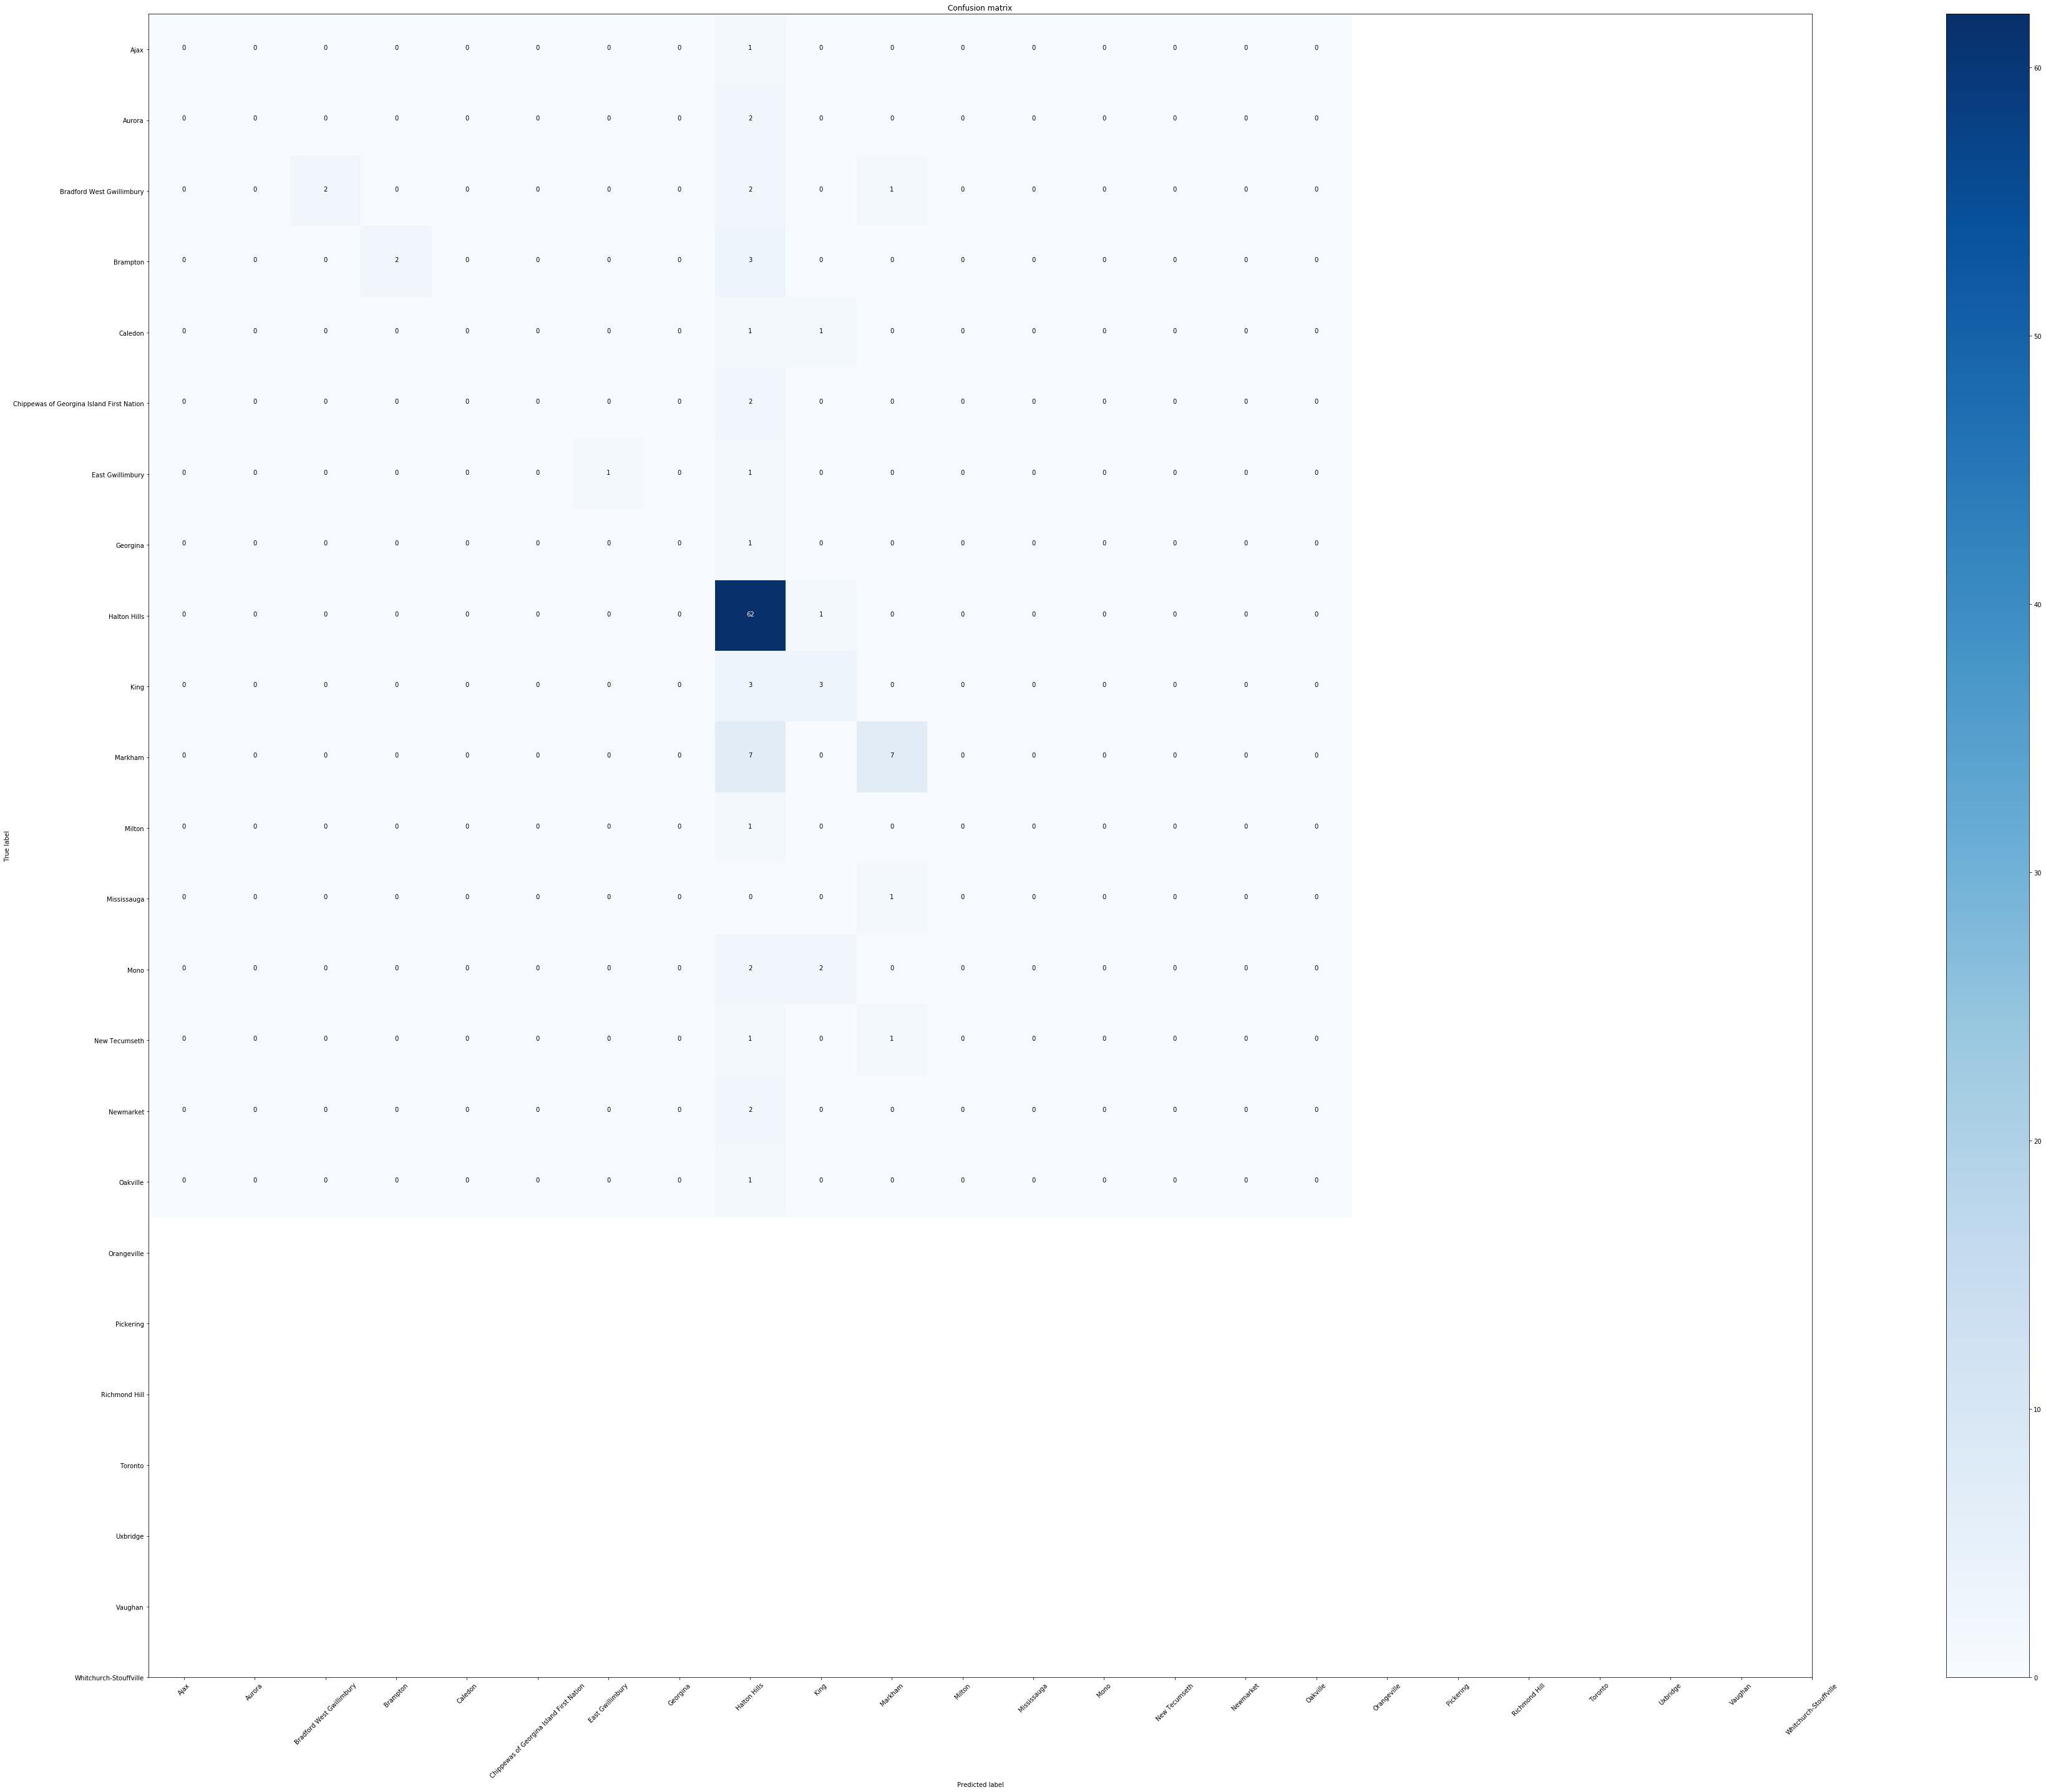

In [18]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
classification_model(model, df_ct)

### Ensemble Gradient Boosting (Multiclass as One-vs-All)

Train Index:  [   0    1    2 ... 1143 1144 1145] 

Test Index:  [   6   27   41   47   49   65   80   81   90   94  101  108  111  119
  120  126  133  135  142  148  154  159  181  186  190  194  201  204
  205  220  228  248  255  258  301  306  340  350  372  382  390  393
  395  414  452  455  463  464  472  484  494  512  521  529  530  550
  567  572  577  587  599  604  628  655  664  688  691  701  709  713
  721  725  734  735  742  746  757  765  767  775  776  786  798  802
  815  817  823  828  838  842  877  898  916  929  934  943  948  950
  967  982  985  996  998 1006 1072 1085 1100 1108 1112 1118 1125 1126
 1133 1136 1142]
Train Index:  [   0    1    2 ... 1143 1144 1145] 

Test Index:  [   8   10   34   35   60   62   75   76   78   85   88   99  104  139
  156  165  180  189  191  195  200  202  216  236  259  274  283  298
  304  314  323  329  331  335  348  349  388  401  403  430  439  443
  471  473  478  480  482  493  495  509  528  534  537  541  546  554
 

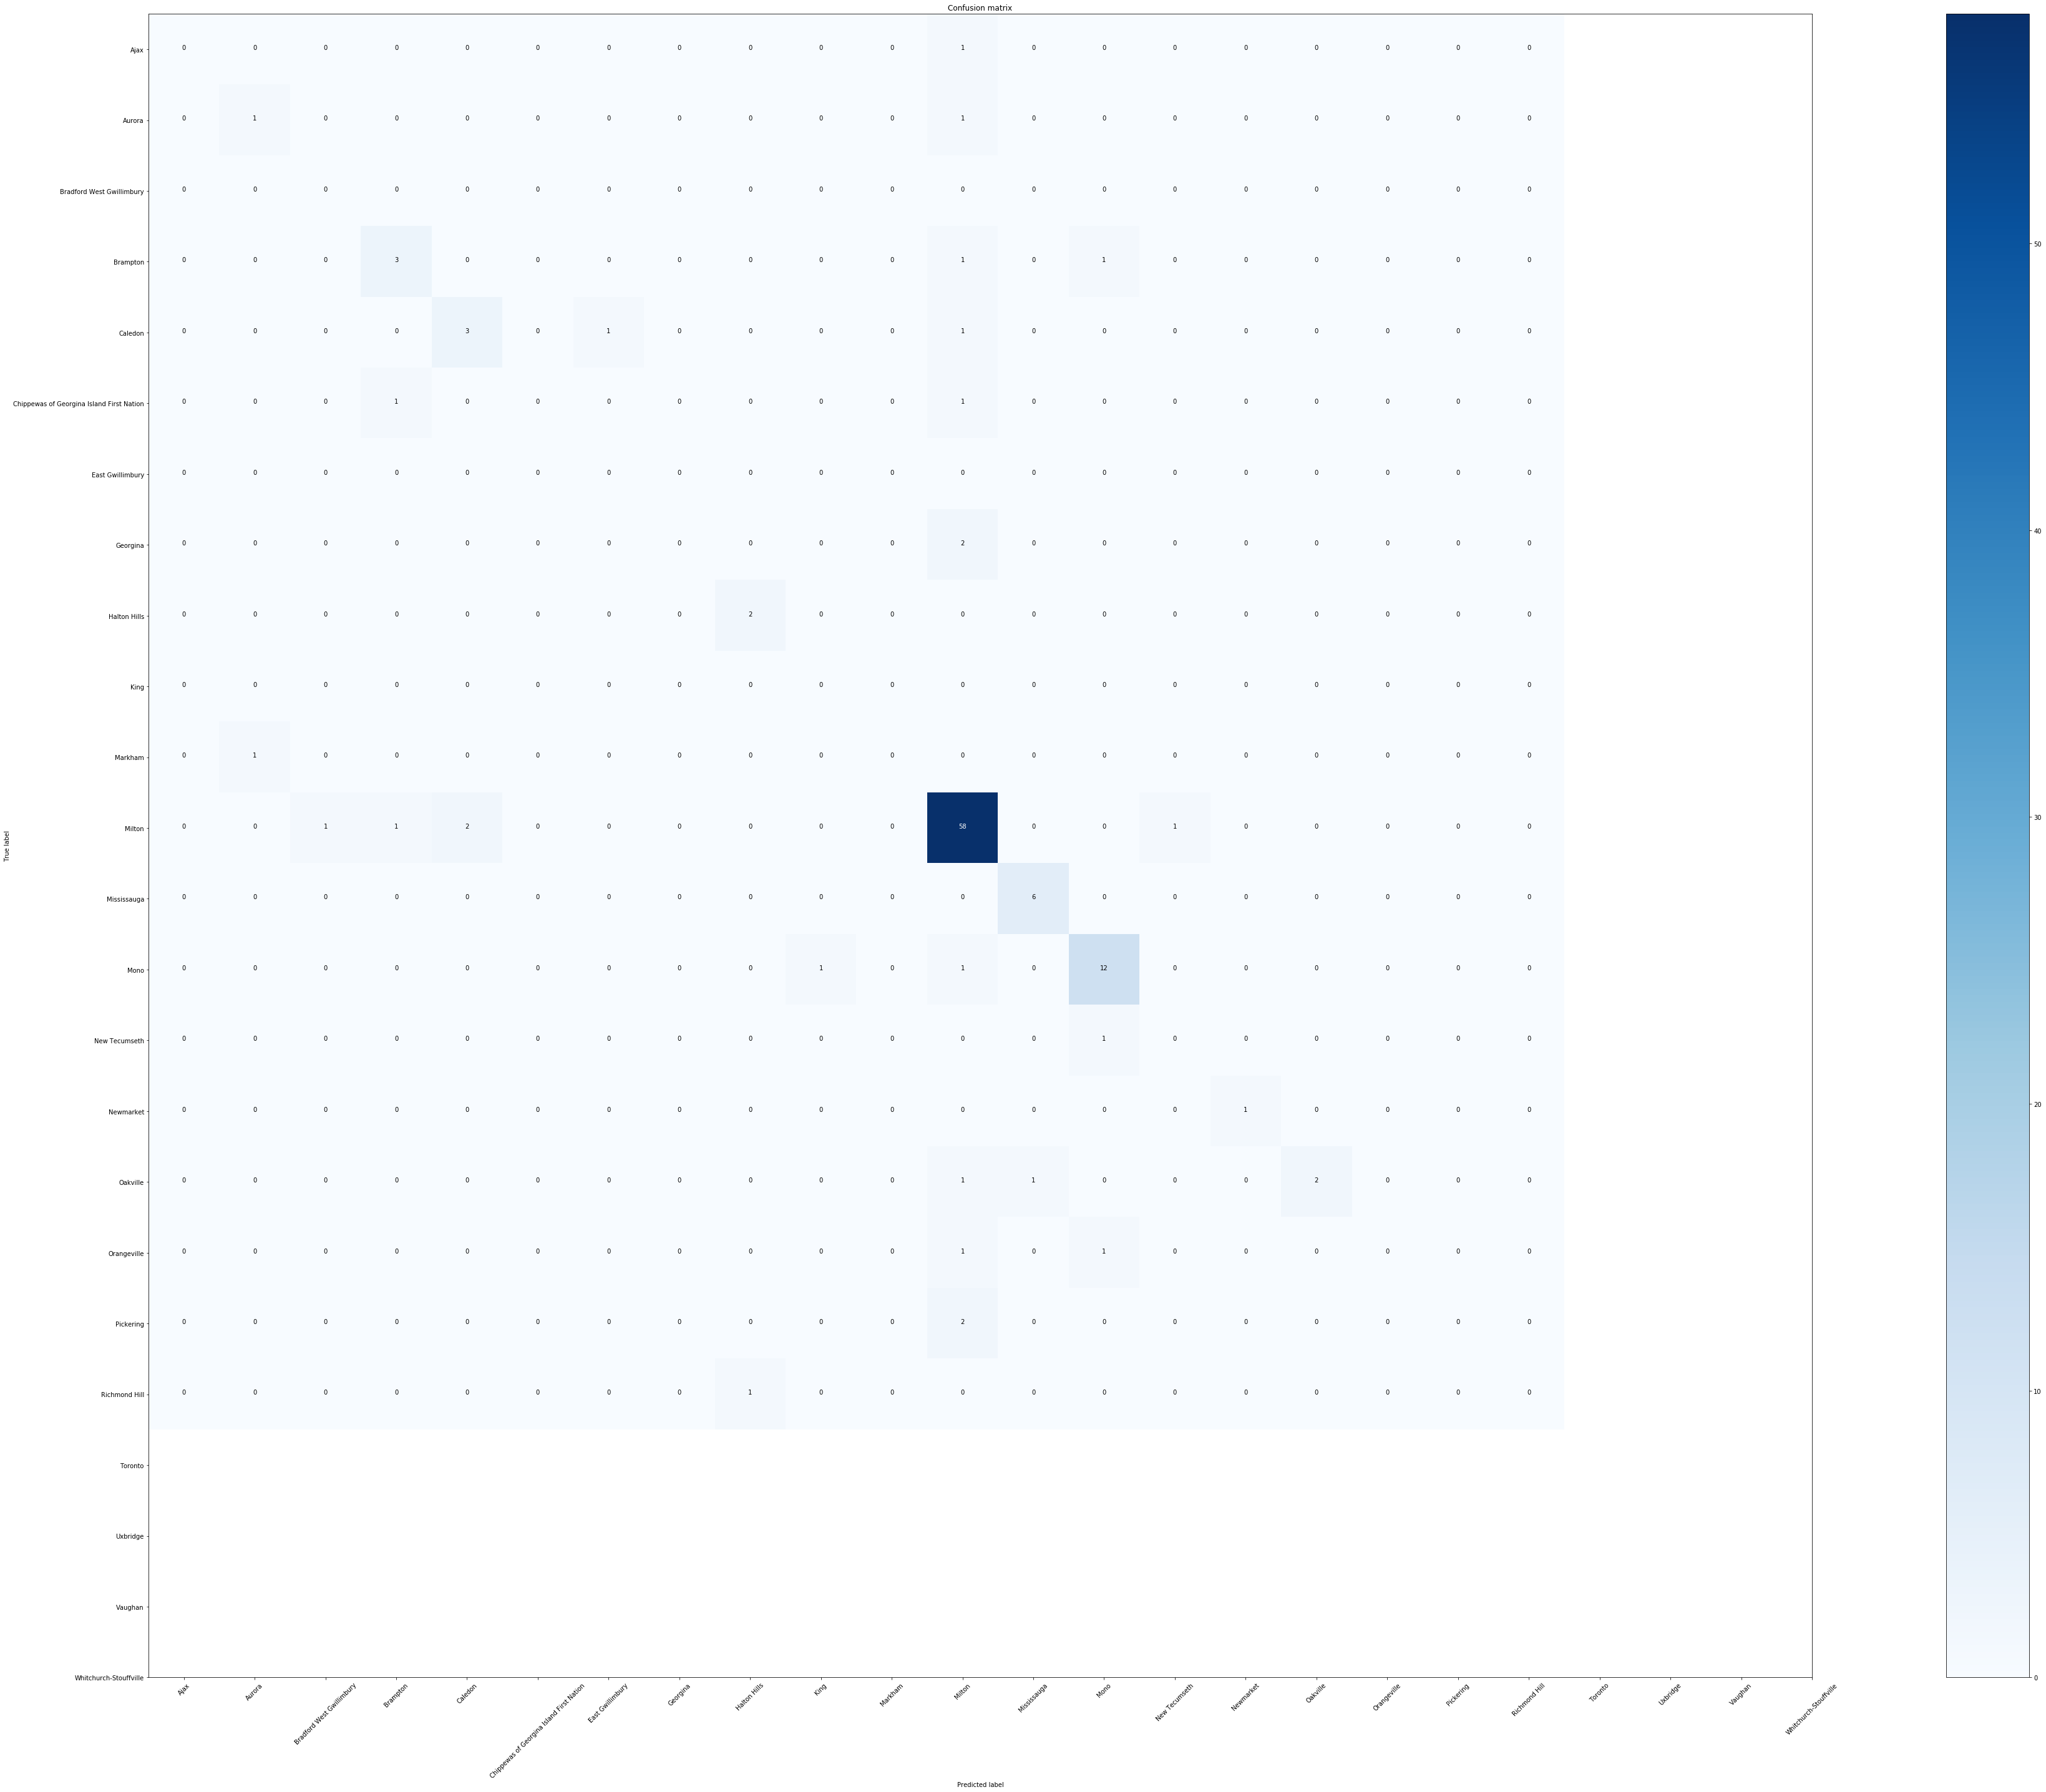

In [19]:
model = GradientBoostingClassifier()
classification_model(model, df_ct)

&emsp;&emsp; From the evaluation of different classification models, we can see that linear models of perception and logistic regression generally performs better than decision trees and Naive Bayes. However, ensemble boosting outperforms all the individual classifiers with performance scores achieving over 75%. Given the real-world data, these results illustrate relative positive feedback of the socio-economic characteristics features in predicting or representing the corresponding GTA census subdivisions. Such feedback can be further used to predict new test instances to support property buyers or renters in a residential location in the GTA. 

# 5. Challenges & Recommendations

&emsp;&emsp; Aside from the classification model performance evaluation, there is also an important spatial statistical bias to consider from the census dataset itself due to its inherent boundary issue called the Modifiable Areal Unit Problem (MAUP) (Charlton, 2009). It refers to two related issues of scaling effect and zoning effect of spatial boundaries. The aggregation of scale effect can alter classification predictions because the raw dataset information may vary depending on the spatial scale of analysis such as Census Tracts vs Dissemination Areas. Furthermore, within the same spatial scale, the arbitrary schemes of census tract zoning may also influence classification predictions results due to the variances of raw data aggregation such as changes in Census Tracts boundary between census years (Charlton, 2009). 
<br>
&emsp;&emsp; Nonetheless, this case study has shown that individual or household's socioeconomic characteristics are important factors for residential location preferences. Hence, data mining can play a critical support role in providing more readily valuable information to the property renters or buyers. 

# 6. References

https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm <br>
https://www12.statcan.gc.ca/datasets/Index-eng.cfm?Temporal=2016&Theme=-1&VNAMEE=&GA=8&S=0 <br>
https://www12.statcan.gc.ca/nhs-enm/2011/as-sa/99-010-x/99-010-x2011001-eng.cfm <br>
https://www.sciencedirect.com/science/article/pii/S2352146516307438 <br>
https://www.sciencedirect.com/science/article/pii/S1877705815031847 <br>
https://www.sciencedirect.com/topics/earth-and-planetary-sciences/modifiable-areal-unit-problem <br>

# 7. Appendix - ArcGIS raw spatial database development

<img src="Images/pic_2.png"> 
<img src="Images/pic_5.png"> 
<img src="Images/pic_6.png"> 
<img src="Images/pic_7.png"> 
<img src="Images/pic_8.png"> 
<img src="Images/pic_9.png"> 
<img src="Images/pic_10.png"> 
<img src="Images/pic_11.png">
<img src="Images/pic_12.png">